In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime

%matplotlib inline

In [2]:
df = pd.read_csv('crypto_prices.csv')

In [3]:
df.head()

,dtime,time,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,...,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
0,2020-09-18,1600387200,10944.8,11039.1,10882.3,10949.6,10955.4,1205.851639,5998,9.309199,...,48.89,49.04,48.25,48.61,48.58,9171.458077,550,3.892636,3.876396,3.883212
1,2020-09-17,1600300800,10951.1,11043.2,10750.3,10944.8,10878.9,3387.945447,25530,9.309570,...,47.73,49.57,47.68,48.89,48.59,16512.480430,1498,3.903386,3.864512,3.883418
2,2020-09-16,1600214400,10785.2,11097.9,10670.2,10951.1,10941.7,4155.036210,43022,9.314511,...,48.31,48.76,46.98,47.73,47.97,27210.897291,2007,3.886910,3.849722,3.870576
3,2020-09-15,1600128000,10675.0,10935.0,10620.0,10785.2,10790.4,4280.924355,17159,9.299724,...,49.09,50.31,48.18,48.31,49.00,32381.530226,2143,3.918204,3.874944,3.891820
4,2020-09-14,1600041600,10328.2,10740.2,10251.2,10674.9,10550.5,3833.824636,14512,9.281749,...,48.16,49.61,47.16,49.09,48.24,20583.873788,1775,3.904192,3.853546,3.876189


In [4]:
df.set_index('dtime', inplace=True)

In [5]:
df = df.drop(columns = ['time'])

In [6]:
df.head()

,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,log_vwap_BTC,...,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
dtime,,,,,,,,,,,,,,,,,,,,,
2020-09-18,10944.8,11039.1,10882.3,10949.6,10955.4,1205.851639,5998,9.309199,9.294893,9.301588,...,48.89,49.04,48.25,48.61,48.58,9171.458077,550,3.892636,3.876396,3.883212
2020-09-17,10951.1,11043.2,10750.3,10944.8,10878.9,3387.945447,25530,9.309570,9.282689,9.294580,...,47.73,49.57,47.68,48.89,48.59,16512.480430,1498,3.903386,3.864512,3.883418
2020-09-16,10785.2,11097.9,10670.2,10951.1,10941.7,4155.036210,43022,9.314511,9.275210,9.300336,...,48.31,48.76,46.98,47.73,47.97,27210.897291,2007,3.886910,3.849722,3.870576
2020-09-15,10675.0,10935.0,10620.0,10785.2,10790.4,4280.924355,17159,9.299724,9.270494,9.286412,...,49.09,50.31,48.18,48.31,49.00,32381.530226,2143,3.918204,3.874944,3.891820
2020-09-14,10328.2,10740.2,10251.2,10674.9,10550.5,3833.824636,14512,9.281749,9.235150,9.263929,...,48.16,49.61,47.16,49.09,48.24,20583.873788,1775,3.904192,3.853546,3.876189


In [9]:
# Need to reset the index so it starts with oldest date first to properly plot.

df = df.reindex(index=df.index[::-1])

In [10]:
df.head()

,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,log_vwap_BTC,...,open_LTC,high_LTC,low_LTC,close_LTC,vwap_LTC,volume_LTC,count_LTC,log_high_LTC,log_low_LTC,log_vwap_LTC
dtime,,,,,,,,,,,,,,,,,,,,,
2018-09-30,6582.2,6641.0,6518.0,6604.1,6584.8,1020.607491,3376,8.801018,8.782323,8.792519,...,61.12,62.77,59.70,60.96,60.82,8109.434922,1011,4.139477,4.089332,4.107919
2018-10-01,6603.8,6633.3,6490.2,6572.6,6564.9,1863.850102,5019,8.799858,8.778049,8.789493,...,60.96,61.82,59.08,60.29,60.18,9359.218092,1249,4.124227,4.078892,4.097340
2018-10-02,6574.5,6597.0,6436.2,6500.0,6529.6,2458.395238,4704,8.794370,8.769694,8.784101,...,60.45,61.46,58.67,59.15,60.15,4359.474024,874,4.118387,4.071929,4.096841
2018-10-03,6497.7,6521.1,6397.6,6463.9,6470.3,4959.145443,8269,8.782798,8.763678,8.774978,...,59.14,59.20,56.50,57.23,57.58,8337.848361,1060,4.080922,4.034241,4.053175
2018-10-04,6463.8,6598.9,6461.0,6547.4,6550.8,1940.218975,5664,8.794658,8.773539,8.787342,...,57.16,58.84,56.52,57.97,58.12,8468.435950,607,4.074822,4.034595,4.062510


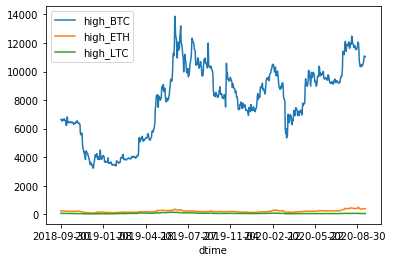

In [11]:
df.plot(y=['high_BTC', 'high_ETH', 'high_LTC'])

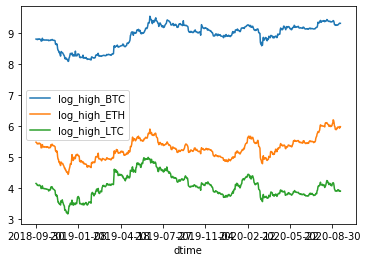

In [12]:
df.plot(y=['log_high_BTC', 'log_high_ETH', 'log_high_LTC'])

The log transformation allows a better view of how the prices move in conjunction. There appears to be a bit of a relationship.

## Daily Returns

Going to calculate the daily return based on the raw high price and the log_high price.

In [13]:
df['BTC_daily_return'] = df['high_BTC'].pct_change()

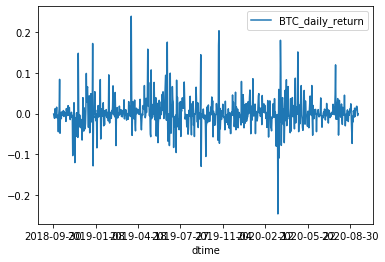

In [14]:
df.plot(y=['BTC_daily_return'])

In [15]:
df['ETH_daily_return'] = df['high_ETH'].pct_change()

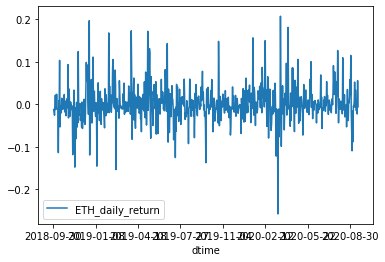

In [16]:
df.plot(y=['ETH_daily_return'])

In [18]:
df['LTC_daily_return'] = df['high_LTC'].pct_change()

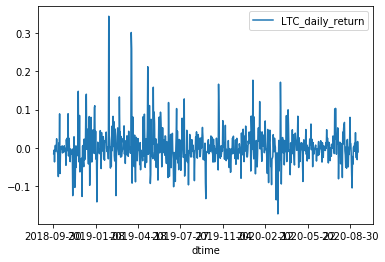

In [19]:
df.plot(y=['LTC_daily_return'])

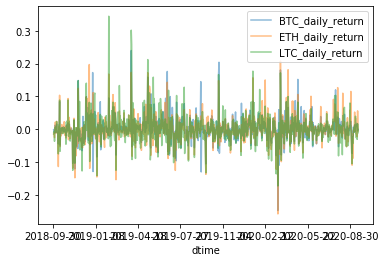

In [20]:
df.plot(y=['BTC_daily_return', 'ETH_daily_return', 'LTC_daily_return'],
       alpha=0.5)

Plotting the daily return on the high prices shows the prices move similarly. Later EDA will test if the time-series is stationary or requires transformations to become statationary.

In [21]:
df['BTC_log_return'] = df['log_high_BTC'].pct_change()
df['ETH_log_return'] = df['log_high_ETH'].pct_change()
df['LTC_log_return'] = df['log_high_LTC'].pct_change()

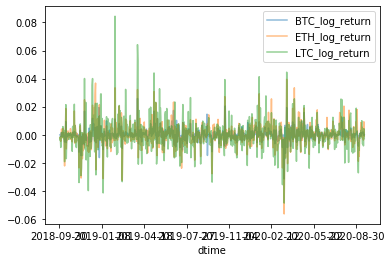

In [22]:
df.plot(y=['BTC_log_return', 'ETH_log_return', 'LTC_log_return'],
       alpha=0.5)

## Histogram of Returns

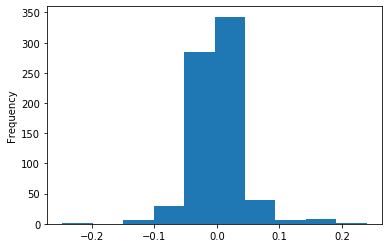

In [23]:
df['BTC_daily_return'].plot.hist()

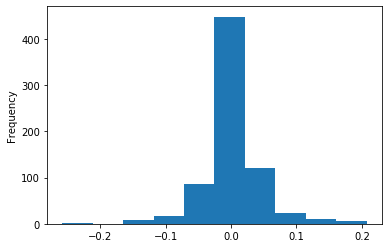

In [24]:
df['ETH_daily_return'].plot.hist()

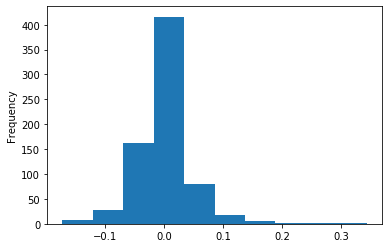

In [25]:
df['LTC_daily_return'].plot.hist()

## Histogram of Daily Log Returns

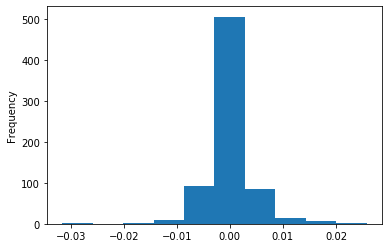

In [26]:
df['BTC_log_return'].plot.hist()

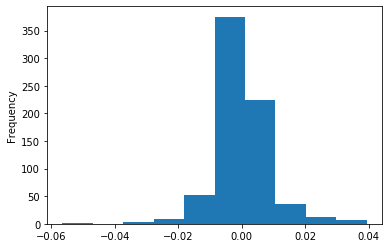

In [27]:
df['ETH_log_return'].plot.hist()

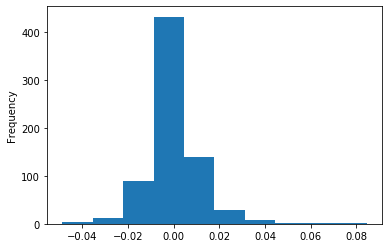

In [28]:
df['LTC_log_return'].plot.hist()

## KDE Plots, daily/log returns

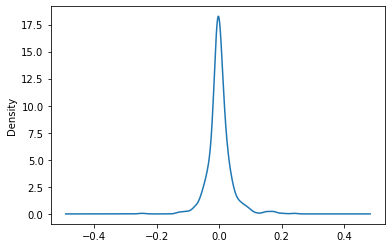

In [29]:
df['BTC_daily_return'].plot.kde()

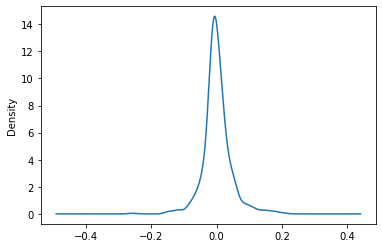

In [30]:
df['ETH_daily_return'].plot.kde()

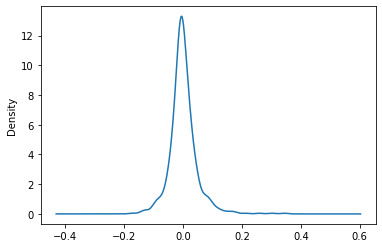

In [31]:
df['LTC_daily_return'].plot.kde()

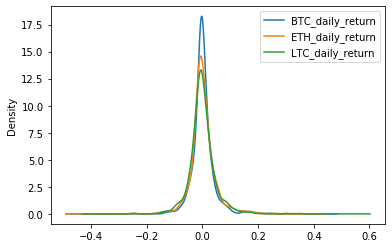

In [32]:
df[['BTC_daily_return', 'ETH_daily_return', 'LTC_daily_return']].plot.kde()

Very similar distributions between all three. Fairly uniform with some left skew on LTC and right skew on ETH.

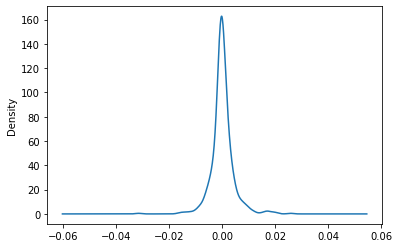

In [33]:
df['BTC_log_return'].plot.kde()

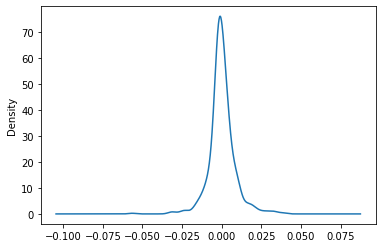

In [34]:
df['ETH_log_return'].plot.kde()

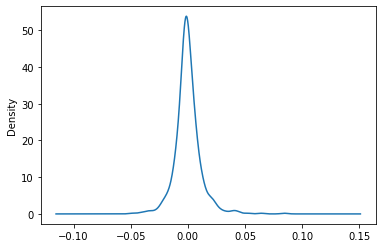

In [35]:
df['LTC_log_return'].plot.kde()

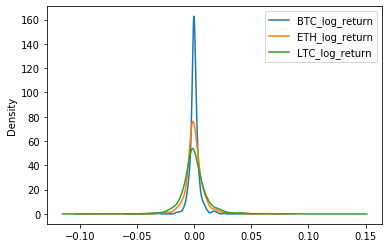

In [36]:
df[['BTC_log_return', 'ETH_log_return', 'LTC_log_return']].plot.kde()

## Boxplots of Daily/Log Returns

Might take out the boxplot

Ask Blake about it

c:\users\pam\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\cbook\__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
c:\users\pam\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
c:\users\pam\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\cbook\__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
c:\users\pam\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\cbook\__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'whiskers': [<matplotlib.lines.Line2D at 0x10118f88>,
  ...],
 'caps': [<matplotlib.lines.Line2D at 0x10127310>,
  ...],
 'boxes': [<matplotlib.lines.Line2D at 0x10118dd8>,
 'medians': [<matplotlib.lines.Line2D at 0x10127670>,
 'fliers': [<matplotlib.lines.Line2D at 0x101277f0>,
 'means': []}

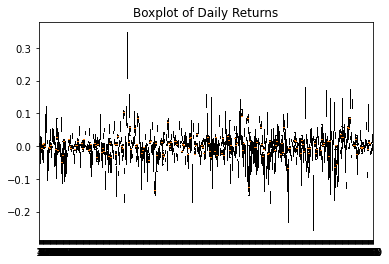

In [50]:
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot of Daily Returns')
ax1.boxplot(df[['BTC_daily_return', 'ETH_daily_return', 'LTC_daily_return']])

## Volume

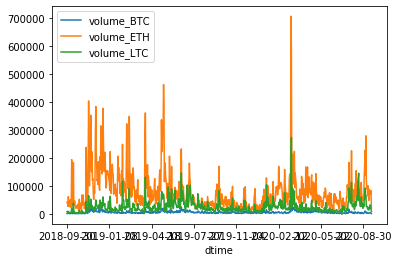

In [37]:
df.plot(y=['volume_BTC', 'volume_ETH', 'volume_LTC'])

ETH volume has more volatility than BTC and LTC. Could be something worth investigating.

May want to do some more with this?

## Experimenting with Pandas Lag Plot

In [38]:
from pandas.plotting import lag_plot

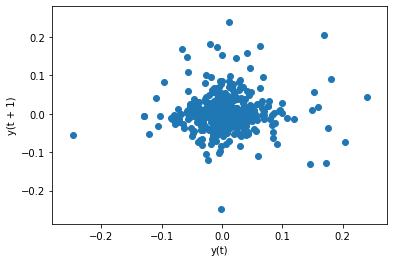

In [39]:
lag_plot(df['BTC_daily_return'])

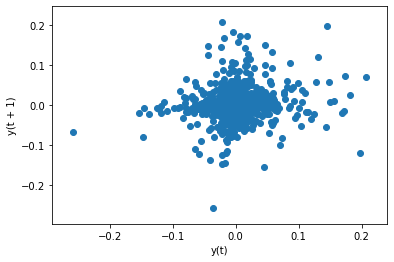

In [40]:
lag_plot(df['ETH_daily_return'])

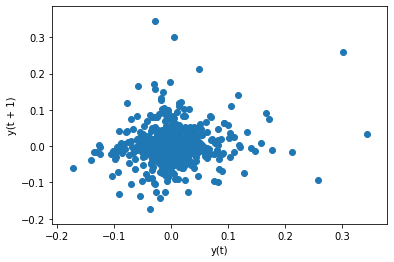

In [41]:
lag_plot(df['LTC_daily_return'])

Lag plots for log returns

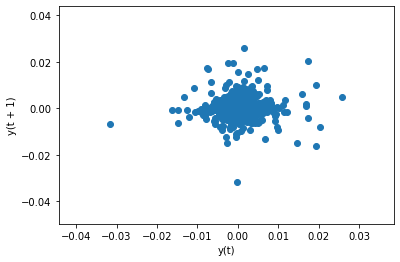

In [42]:
lag_plot(df['BTC_log_return'])

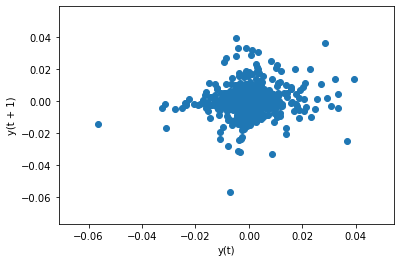

In [43]:
lag_plot(df['ETH_log_return'])

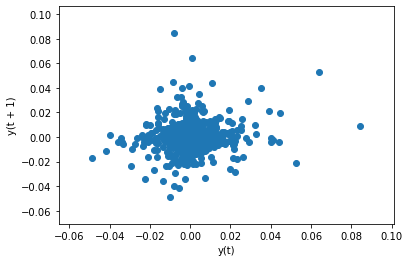

In [44]:
lag_plot(df['LTC_log_return'])